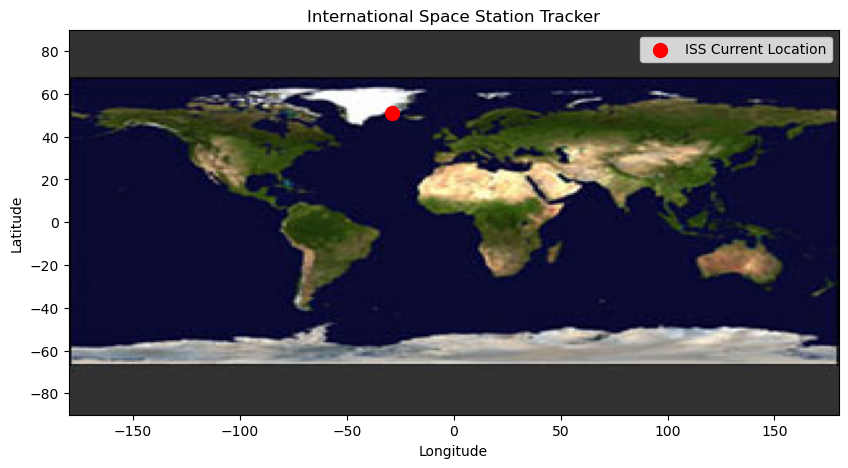

ISS passes not found for the specified location.


In [25]:
import json
import requests
import matplotlib.pyplot as plt

def get_iss_location():
    try:
        response = requests.get('http://api.open-notify.org/iss-now.json')
        response.raise_for_status()
        data = response.json()
        longitude = float(data['iss_position']['longitude'])
        latitude = float(data['iss_position']['latitude'])
        return longitude, latitude
    except (requests.exceptions.RequestException, json.JSONDecodeError) as e:
        print('Error retrieving ISS location:', str(e))
        return None

def plot_iss_location(longitude, latitude, map_image):
    plt.figure(figsize=(10, 5))
    world_map = plt.imread(map_image)
    plt.imshow(world_map, extent=[-180, 180, -90, 90])
    plt.scatter(longitude, latitude, color='red', s=100, label='ISS Current Location')
    plt.title('International Space Station Tracker')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()

def calculate_iss_pass(location):
    try:
        url = f"http://api.open-notify.org/iss-pass.json?lat={location[0]}&lon={location[1]}"
        response = requests.get(url)
        if response.status_code == 404:
            print('ISS passes not found for the specified location.')
            return
        response.raise_for_status()
        data = response.json()
        passes = data['response']
        for p in passes:
            pass_time = p['risetime']
            duration = p['duration']
            print(f"ISS will pass over the location at: {pass_time}, Duration: {duration} seconds")
    except (requests.exceptions.RequestException, json.JSONDecodeError) as e:
        print('Error retrieving ISS passes:', str(e))

# Get ISS location
location = get_iss_location()
if location:
    longitude, latitude = location

    # Plot ISS location on map
    map_image = 'world_map.jpg'
    plot_iss_location(longitude, latitude, map_image)

    # Calculate ISS passes for a specific location
    calculate_iss_pass(location)
